In [ ]:
pip install google_play_scraper

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp36-none-any.whl size=22280 sha256=4ef198e60d99f4334b2ff9a14db50fe480ce296933a2d277ec5b64e82ab70680
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.1-cp36-cp36m-linux_x86_64.whl size=149175 sha256=9e7dcca1597206c68d001ea0712445c224959540795137080058675ea8088f44
  Stored in directory: /root/.cache/pip/wheels/ae/69/ea/4798f98317cbab35d78fea64d36bd7b2b18faca88568ef15b0
Successfully built python-levenshtein


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=f9fa3a1773b741346a810e94e1f7366c6e45d938c12d4f04908700d4842665fc
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
pip install twython

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm
import emoji
from gensim.parsing.preprocessing import remove_stopwords
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import Sort, reviews
from google.colab import files
sia=SentimentIntensityAnalyzer()

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews('indwin.c3.shareapp',lang='en',country='us',sort=Sort.NEWEST,count=80000)

In [ ]:
df=pd.DataFrame.from_dict(result)

In [ ]:
df.sort_values(by='at')

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
43605,gp:AOqpTOESoYLaV-RHF9caieLTTDFUTI8wHSHEA3SwQkZ...,Pratik Mall,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Redefines the rental space.,5,4,1.01,2015-07-02 17:30:40,Thanks Buddy :),2016-02-13 17:21:50
43604,gp:AOqpTOGtxgftq7pBNBYosGFqpTxbNs4YgMORsP83D6Y...,Nikita Bajaj,https://play-lh.googleusercontent.com/a-/AOh14...,Amazing app,5,3,1.01,2015-07-02 17:52:17,Thanks Nikita :),2016-02-13 17:20:47
43603,gp:AOqpTOFy61poskC0a8kRhPA_Yge8yjWS4pXh4bx0hRt...,Mustafa Baquari,https://play-lh.googleusercontent.com/-EbTJW6M...,Great app. A necessary service brought to the ...,5,3,1.01,2015-07-02 18:22:50,Thanks Buddy :),2016-02-13 17:21:56
43602,gp:AOqpTOF8TgugGoaEtEX37EMtsOGNN4YHLJlRTswgmT6...,gouthamy nair,https://play-lh.googleusercontent.com/-ewRAFfn...,Great idea definitely! The UI is really good...,5,5,1.01,2015-07-02 18:55:27,Thanks Buddy :),2016-02-13 17:22:04
43601,gp:AOqpTOFCEdvbXqWKXsTjIKQ2rVGU21s5KuxRvRvvo7T...,Neeraj Purohit,https://play-lh.googleusercontent.com/a-/AOh14...,Renting is fun now!! Elegant UI :) Overall ter...,5,3,1.01,2015-07-02 19:30:06,Thanks Buddy :),2016-02-13 17:22:13
...,...,...,...,...,...,...,...,...,...,...
4,gp:AOqpTOGZXWUPulreTQ9xNgABMvEgUXFh7737R6yzIrF...,Immedisetti Bobby,https://play-lh.googleusercontent.com/-hroLd44...,Worst app. Unable to apply card. Getting error...,1,0,5.4.0.0,2021-01-22 16:40:19,None,NaT
3,gp:AOqpTOHNfUsd9KBXFMarG-Gf-yn8q4btubI1p1-6wpY...,Sai Manikanta Kothuri,https://play-lh.googleusercontent.com/a-/AOh14...,"Bad experience , unable to apply card , even m...",1,0,5.4.0.0,2021-01-22 16:41:28,None,NaT
2,gp:AOqpTOHHowj1mJgV0CLhsFDVeDKNolyxIEMntFdo5W9...,sami ahmed,https://play-lh.googleusercontent.com/a-/AOh14...,Im just loving it to use and there is no hidde...,5,0,5.4.0.0,2021-01-22 16:50:15,None,NaT
1,gp:AOqpTOEWqbIyh3aEHVMw4GVaVXPMcLobYc5Xc8SCdEo...,Bharath raj,https://play-lh.googleusercontent.com/a-/AOh14...,Good app for lending loan to students,4,0,5.4.0.0,2021-01-22 17:17:41,None,NaT


In [ ]:
import datetime
x=datetime.datetime(2020,1,1)

In [ ]:
df=df.loc[df['at']>=x]

In [ ]:
df.count()

reviewId                29303
userName                29303
userImage               29303
content                 29303
score                   29303
thumbsUpCount           29303
reviewCreatedVersion    14961
at                      29303
replyContent            25511
repliedAt               25511
dtype: int64

In [ ]:
y=datetime.datetime.now()

In [ ]:
y-x

datetime.timedelta(387, 69975, 719260)

In [ ]:
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','at'],axis=1,inplace=True)

In [ ]:
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

100%|██████████| 29303/29303 [00:15<00:00, 1861.10it/s]


,content,score,cleaned
0,Please remove my id on hold please remove hold...,5,remove id hold remove hold slice pay team thank
1,Good app for lending loan to students,4,good app lending loan students
2,Im just loving it to use and there is no hidde...,5,im loving use hidden charges showing clearly
3,"Bad experience , unable to apply card , even m...",1,bad experience unable apply card friend facing...
4,Worst app. Unable to apply card. Getting error...,1,worst app unable apply card getting error frie...


In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex
df.head()
df.to_csv('Nira_1year_2021-01-21 18:16:08.csv')
files.download('Nira_1year_2021-01-21 18:16:08.csv')

100%|██████████| 29303/29303 [01:09<00:00, 420.86it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,content,score,cleaned,word__vec
0,Please remove my id on hold please remove hold...,5,remove id hold remove hold slice pay team thank,"[remove, id, hold, remove, hold, slice, pay, t..."
1,Good app for lending loan to students,4,good app lending loan students,"[good, app, lending, loan, student]"
2,Im just loving it to use and there is no hidde...,5,im loving use hidden charges showing clearly,"[im, love, use, hidden, charge, show, clearly]"
3,"Bad experience , unable to apply card , even m...",1,bad experience unable apply card friend facing...,"[bad, experience, unable, apply, card, friend,..."
4,Worst app. Unable to apply card. Getting error...,1,worst app unable apply card getting error frie...,"[bad, app, unable, apply, card, get, error, fr..."


In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1
print(count)
total=count
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

100%|██████████| 29303/29303 [00:00<00:00, 1199068.21it/s]


20054


[('intrest', 0.9755420684814453),
 ('low', 0.9492312073707581),
 ('compare', 0.9443020820617676),
 ('mantinace', 0.933671236038208),
 ('studentswe', 0.9322130680084229),
 ('reasonable', 0.9316562414169312),
 ('price', 0.9239951372146606),
 ('laon', 0.9230639338493347),
 ('east', 0.9212332367897034),
 ('freely', 0.9198337197303772),
 ('hassle', 0.9194403886795044),
 ('cognizant', 0.9192383885383606),
 ('easily', 0.9191652536392212),
 ('faciloan', 0.9181489944458008),
 ('interestdownload', 0.9170742034912109),
 ('situvation', 0.9166861176490784),
 ('creditsfacillites', 0.9164335131645203),
 ('ratesits', 0.915846586227417),
 ('method', 0.9151433706283569),
 ('cardthey', 0.9149515628814697),
 ('whis', 0.9148645997047424),
 ('outstandingvery', 0.9137076735496521),
 ('simple', 0.912848949432373),
 ('domestic', 0.9128149747848511),
 ('applicationit', 0.9124585390090942),
 ('thre', 0.911684513092041),
 ('instantly', 0.9095531702041626),
 ('market', 0.9086523056030273),
 ('usage', 0.90636336803

In [ ]:
total=count

In [ ]:
total

20054

In [ ]:
t=29303

100%|██████████| 29303/29303 [00:09<00:00, 3141.79it/s]



 1189
0.05928991722349656
{'neg': 0.071, 'neu': 0.472, 'pos': 0.457, 'compound': 1.0}


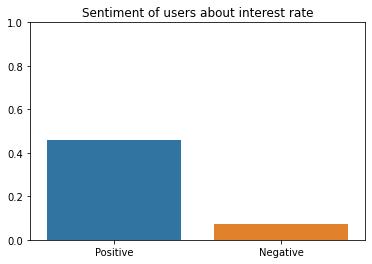

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

100%|██████████| 29303/29303 [00:09<00:00, 3098.40it/s]

1189 5330
4.482758620689655


([<matplotlib.patches.Wedge at 0x7fe552981128>,
 [Text(-1.042418492836901, 0.3512316696877487, ''),
  Text(1.042418492836901, -0.3512316696877488, '')])

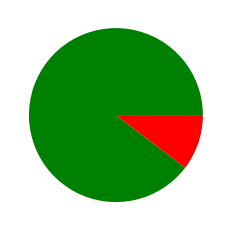

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 1189/1189 [00:00<00:00, 4779.34it/s]


1069 491


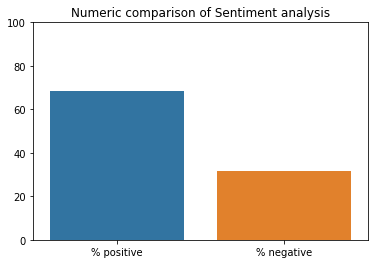

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

251
66
22
[74.04129793510324, 19.469026548672566, 6.489675516224189]


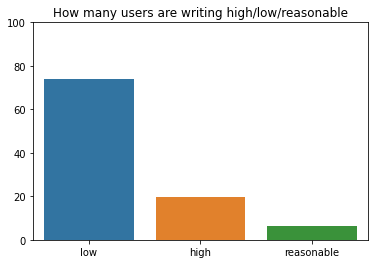

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

100%|██████████| 29303/29303 [00:09<00:00, 3072.01it/s]



 2228
0.11110002991921811
{'neg': 0.049, 'neu': 0.488, 'pos': 0.463, 'compound': 1.0}


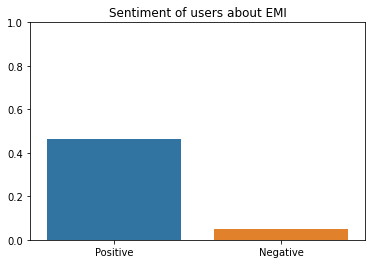

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 29303/29303 [00:10<00:00, 2820.97it/s]

2228 10428
4.6804308797127465


([<matplotlib.patches.Wedge at 0x7fe551ac9fd0>,
 [Text(-1.0778999935872828, 0.21938916068150613, ''),
  Text(1.0778999935872828, -0.21938916068150627, '')])

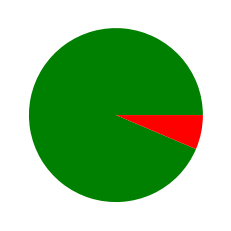

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 2228/2228 [00:00<00:00, 4469.72it/s]


2093 612


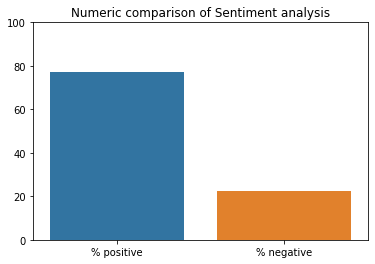

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

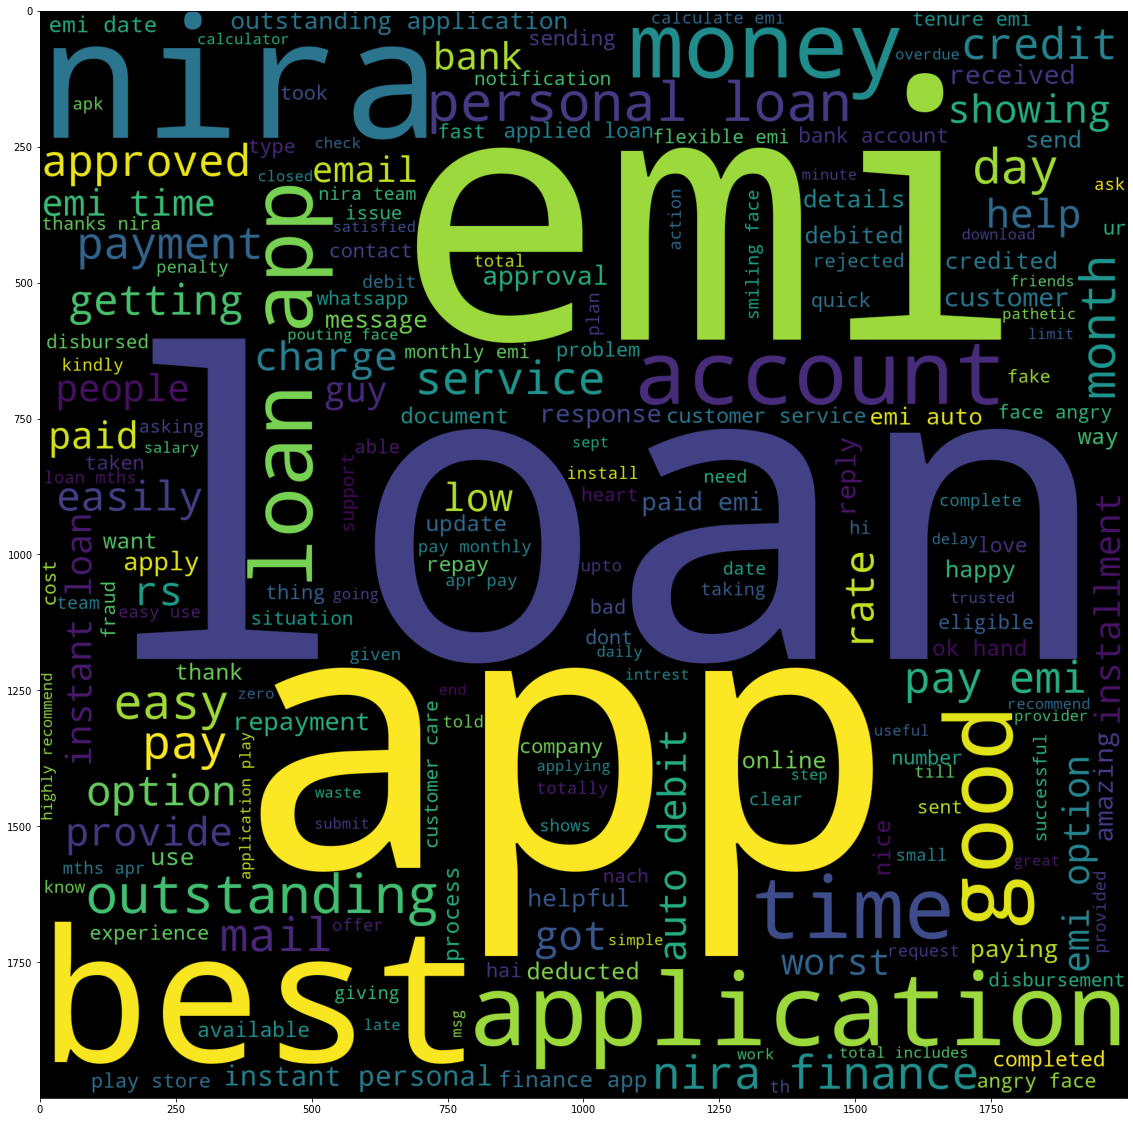

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = list(STOPWORDS)
stopwords=set(stopwords+['loan','app','application'])
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A2)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 29303/29303 [00:14<00:00, 2009.33it/s]



 183
0.00912536152388551
{'neg': 0.185, 'neu': 0.58, 'pos': 0.234, 'compound': 0.9998}


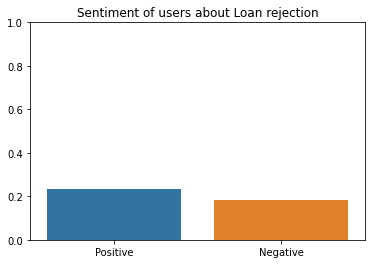

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

100%|██████████| 29303/29303 [00:15<00:00, 1891.42it/s]

183 549
3.0


([<matplotlib.patches.Wedge at 0x7fe5520575c0>,
 [Text(-0.33991877217145816, 1.046162142464278, ''),
  Text(0.3399188701202255, -1.046162110638781, '')])

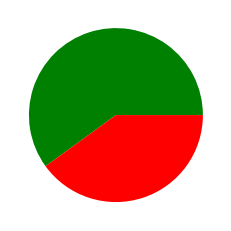

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 183/183 [00:00<00:00, 3423.20it/s]


147 123


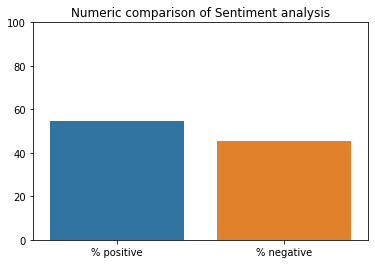

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 29303/29303 [00:12<00:00, 2420.32it/s]



 3387
16.889398623715966
{'neg': 0.087, 'neu': 0.471, 'pos': 0.443, 'compound': 1.0}


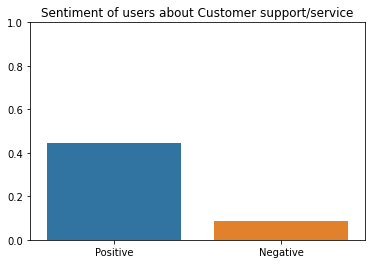

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count*100/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()

100%|██████████| 29303/29303 [00:13<00:00, 2185.14it/s]


 13343 3387
3.9394744611750814


([<matplotlib.patches.Wedge at 0x7fe551c71198>,
 [Text(-0.8646927044240249, 0.6799312663173139, ''),
  Text(0.8646926089343769, -0.6799313877548683, '')])

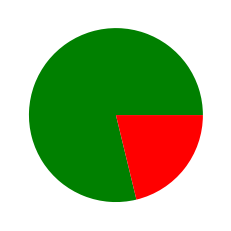

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

3071 1232


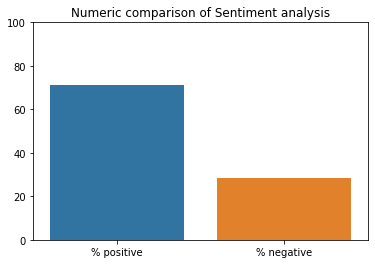

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 29303/29303 [00:19<00:00, 1501.01it/s]



 5635 28.09913234267478
{'neg': 0.056, 'neu': 0.44, 'pos': 0.503, 'compound': 1.0}


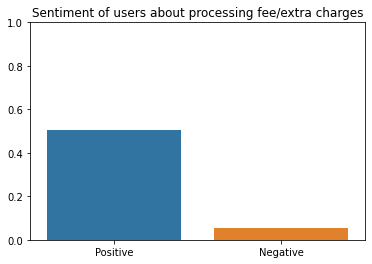

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count*100/total)
dic=sia.polarity_scores(review_about_A6)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/extra charges')
plt.show()

100%|██████████| 29303/29303 [00:20<00:00, 1448.25it/s]



 4.614019520851819


([<matplotlib.patches.Wedge at 0x7fe551174d30>,
 [Text(-1.0678097943800164, 0.2641632885661962, ''),
  Text(1.0678097758304494, -0.264163363547872, '')])

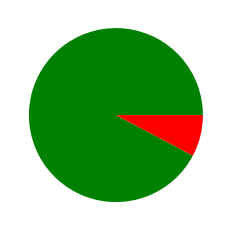

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 5635/5635 [00:01<00:00, 4724.00it/s]


5286 1998


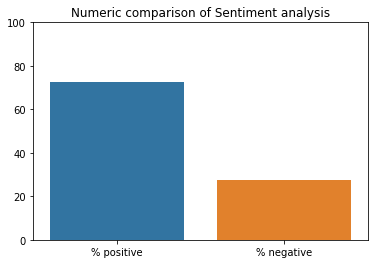

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A6):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

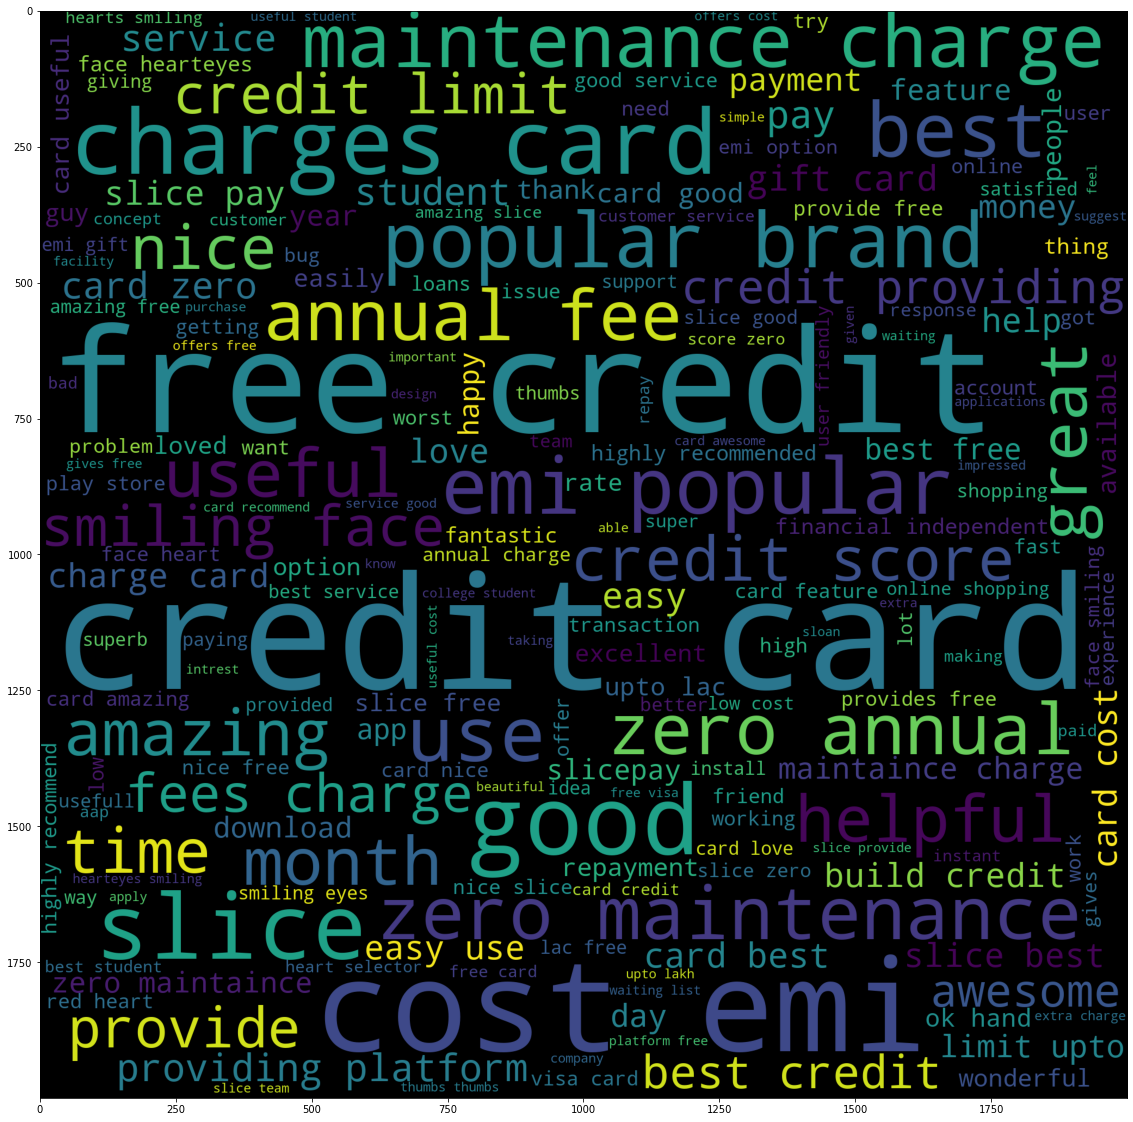

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = list(STOPWORDS)
stopwords=set(stopwords+['loan','app','application'])
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A6)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 29303/29303 [00:16<00:00, 1766.03it/s]



 4370 0.21791163857584522
{'neg': 0.092, 'neu': 0.53, 'pos': 0.378, 'compound': 1.0}


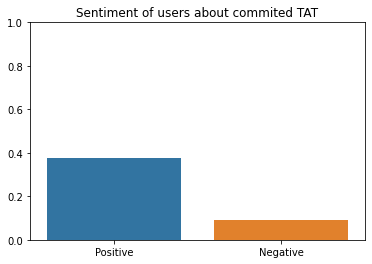

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  

100%|██████████| 29303/29303 [00:17<00:00, 1708.14it/s]


 4370 3.606407322654462


([<matplotlib.patches.Wedge at 0x7fe5516d2d68>,
 [Text(-0.7045728679486435, 0.8447349133015775, ''),
  Text(0.7045728679486434, -0.8447349133015776, '')])

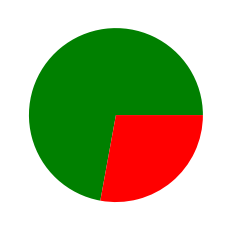

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

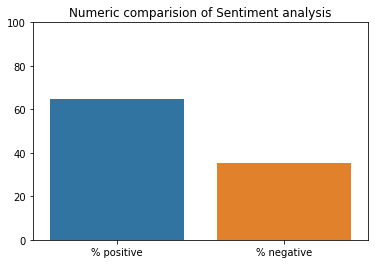

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

100%|██████████| 29303/29303 [00:14<00:00, 2075.54it/s]



 1020 0.05086267078887005
{'neg': 0.155, 'neu': 0.566, 'pos': 0.279, 'compound': 1.0}


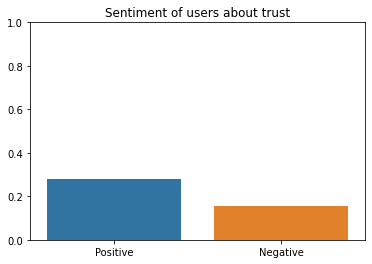

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 

100%|██████████| 29303/29303 [00:14<00:00, 2063.56it/s]


 1020 2.0980392156862746


([<matplotlib.patches.Wedge at 0x7fe550947c18>,
 [Text(0.27487137246208776, 1.0651036234098579, ''),
  Text(-0.27487137246208815, -1.0651036234098579, '')])

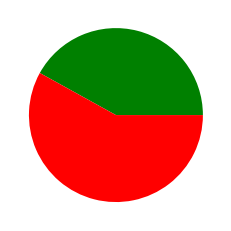

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

650 750


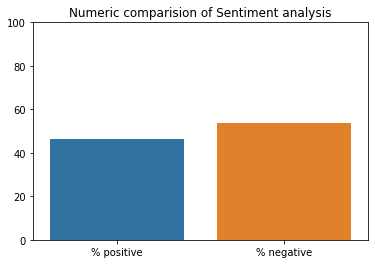

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()


100%|██████████| 29303/29303 [00:10<00:00, 2792.62it/s]



 469 0.023386855490176522
{'neg': 0.157, 'neu': 0.556, 'pos': 0.287, 'compound': 1.0}


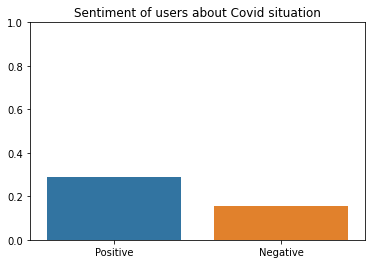

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 

100%|██████████| 29303/29303 [00:11<00:00, 2610.01it/s]


 469 3.579957356076759


([<matplotlib.patches.Wedge at 0x7fe5500cec18>,
 [Text(-0.6904374623926792, 0.8563271048639988, ''),
  Text(0.6904373822175462, -0.8563271695074156, '')])

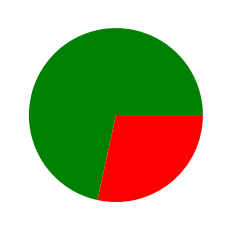

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

407 293


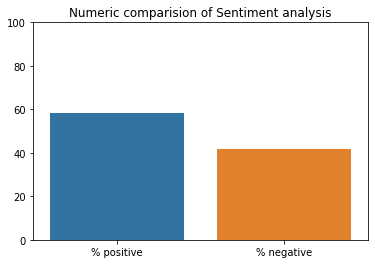

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

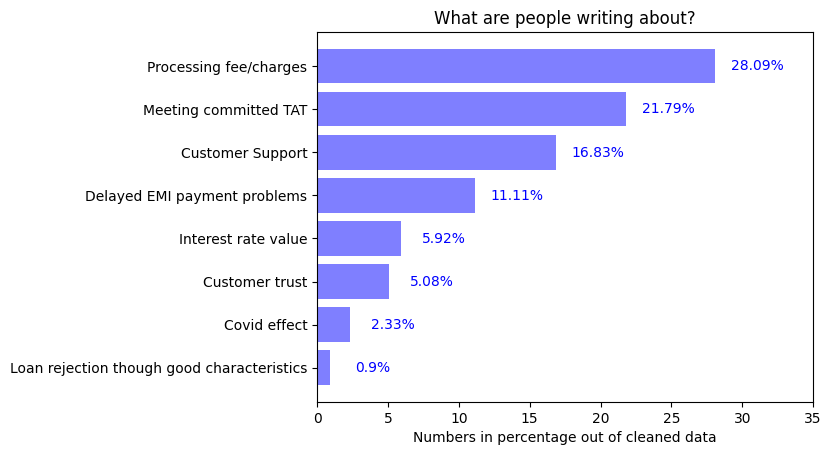

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[5.92,11.11,0.9,16.83,28.09,21.79,5.08,2.33]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,35)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

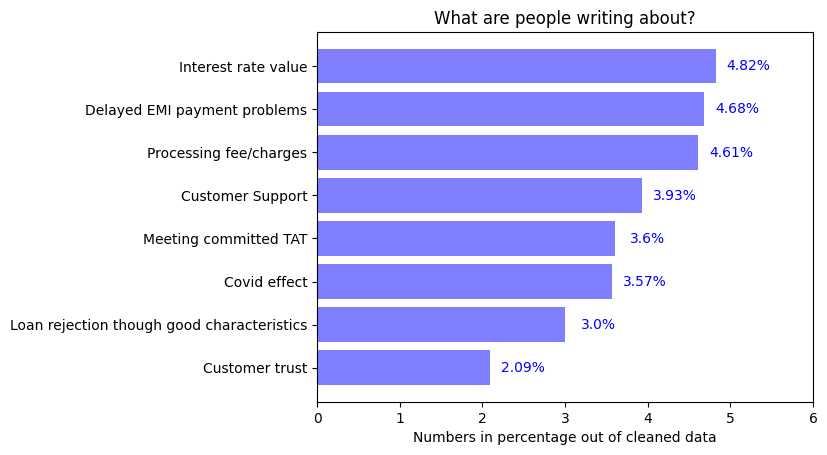

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[4.82,4.68,3.00,3.93,4.61,3.60,2.09,3.57]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,6)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()